# Assignment Week 8
Data Augmentation and AE Networks usinng MNIST

In [16]:
#MNIST is a build in Pytorch dataset
from torchvision import datasets as dts
from torchvision.transforms import ToTensor
train = dts.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test = dts.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [17]:
train[0][0].shape

torch.Size([1, 28, 28])

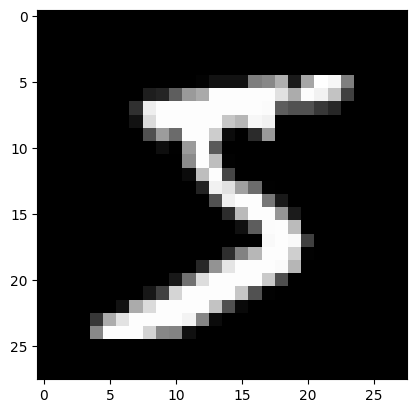

In [87]:
import matplotlib.pyplot as plt
plt.imshow(train[0][0].reshape((28,28)), cmap='gray')

## Exercise 1
Augment the training data with 6 differnet suitable augmentations
* use the PyTorch augmentation framework -> https://pytorch.org/vision/stable/transforms.html
* visualize some examples

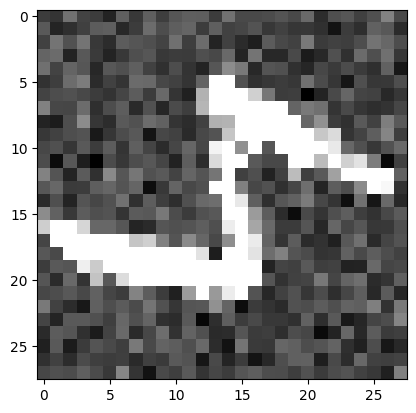

In [115]:
# Image Classification
import torch
from torchvision.transforms import v2


transforms = v2.Compose([
    #v2.RandomResizedCrop(size=(28, 28), antialias=True),
    #v2.RandomHorizontalFlip(p=0.1),
    v2.RandomRotation(60),
    v2.GaussianNoise(0.3,0.1),

    v2.ToDtype(torch.float32, scale=True),
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

plt.imshow(transforms(train[0][0]).reshape((28,28)), cmap='gray')

In [199]:
class MLP_Autoencoder(torch.nn.Module):
    def __init__(self):
        super(MLP_Autoencoder, self).__init__()
        # Encoder
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU()
        )
        # Decoder
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28*28),
            torch.nn.Sigmoid()  # To normalize output between 0 and 1
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

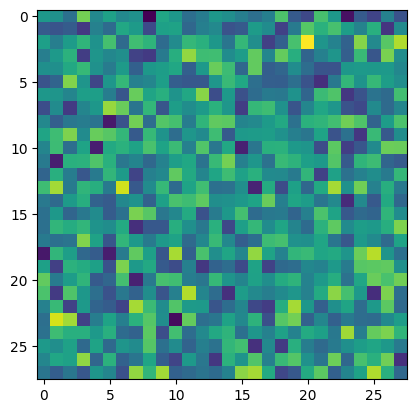

In [193]:
mlp = MLP_Autoencoder()

mlp(train[0][0]).shape

plt.imshow(mlp(train[0][0]).detach().numpy().reshape(28,28))

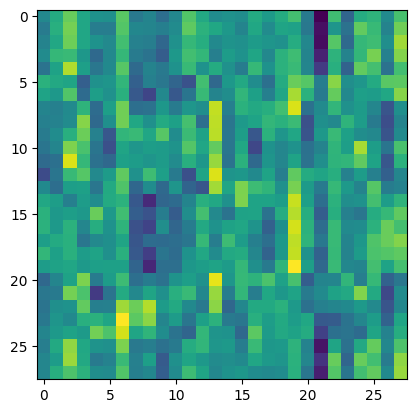

In [176]:
encoder_layer = torch.nn.TransformerEncoderLayer(d_model=28, nhead=4)
transformer_encoder = torch.nn.TransformerEncoder(encoder_layer, num_layers=4)
out = transformer_encoder(train[0][0])


plt.imshow(out.detach().numpy().reshape(28,28))

## Exercise 2
Build and train a MLP Autoencoder with
* 2 Encoder Layers
* 2 Decoder Layers
* Identity Loss

In [118]:
class MLP(torch.nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.en1 = torch.nn.TransformerEncoderLayer(d_model=512, nhead=8)
        self.en2 = torch.nn.TransformerEncoderLayer(d_model=512, nhead=8)
        self.de1 = torch.nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)
        self.de2 = torch.nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)

    def forward(self, x):
        out = self.en1(x)
        out = self.en2(x)
        out = self.de1(x)
        out = self.de2(x)
        return out

## Exercise 3


Use the Gaussian Noise as augmentation and your AE to remove the noise.
* visualize input and output examples

In [4]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

## Exercise 4
Clustering: extract the latent space representations of the train data and apply K-Means (fron Scikit-Learn) with k=10. Use the data lables to evaluate the cluter quality.